# Convolutional Neural Networks I Exercise
---

Wie in der Vorlesung beschrieben bestehen ConvNets neben den Fully Connected Layern aus den beiden Operationen
>- Convolution
- Pooling

### Convolution
---
Wir starten mit der Convolution. Im folgenden wollen wir für ein einfaches Gesicht die Feature Maps für die Gesichtsmerkmale Nase, Ohren, Mund und Nase erstellen. 

>- Lesen Sie dazu zuerst das das Bild face.png ein.  Plotten Sie das Bild.
- Lesen Sie die 4 Filter für Nase, Mund, Augen, Ohren ein. 
- Führen Sie die Convolution via Keras durch (siehe https://keras.io/backend/#conv2d bzw. https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). Legen Sie dazu  **input** und **filter** geeignet an.
- Verwenden Sie einen Stride von 2. Berechnen Sie via der in der Vorlesung gezeigten Relationen die Größe des Output-Tensor und vergleichen Sie (mit output.shape).
- Plotten Sie die 4 Outputs (= Feature Maps) der Convolution.
- Plotten Sie die 4 Outputs (= Feature Maps) der Convolution, wobei nur die Werte geplottet werden sollen, die größer als 80% des Maximum der jeweiligen Feature Maps sind. Sie sollten in dieser Darstellung sehr klar die Positionen der Gesichtsmerkmale erkennen.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [5]:
# Einlesen Bild
A = plt.imread('face.png')
w,h = np.shape(A)
A = A.reshape(1,w,h,1)

# Einlesen des 4 Filter
F1 = plt.imread('filter_1.png')
F2 = plt.imread('filter_2.png')
F3 = plt.imread('filter_3.png')
F4 = plt.imread('filter_4.png')
f_h, f_w = F4.shape

# Erzeugen der  filter in der Form (height,width,in_channels,out_channels)
K = np.zeros(shape=(f_h,f_w, 1, 4), dtype=np.float32)
K[:,:,0,0] = F1
K[:,:,0,1] = F2
K[:,:,0,2] = F3
K[:,:,0,3] = F4

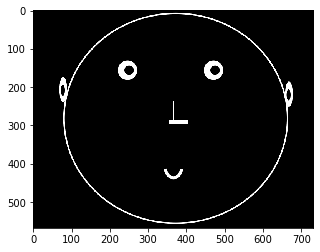

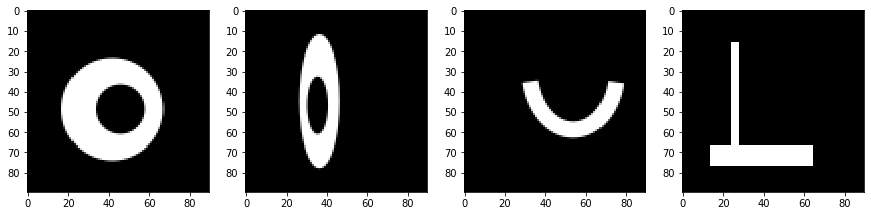

In [4]:
# Plotten des Inputs und der Kernels
plt.imshow(A.reshape(w,h),cmap='gray')
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.imshow(F1.reshape(f_h,f_w),cmap='gray')
plt.subplot(142)
plt.imshow(F2.reshape(f_h,f_w),cmap='gray')
plt.subplot(143)
plt.imshow(F3.reshape(f_h,f_w),cmap='gray')
plt.subplot(144)
plt.imshow(F4.reshape(f_h,f_w),cmap='gray')

In [15]:
# Erstellen des Models
model = Sequential()
model.add( Conv2D(4,kernel_size=f_h,use_bias=False,padding='valid',strides=1, input_shape = (w, h,1)))
model.summary()

model.get_layer('conv2d_1').set_weights([K])
model.compile(optimizer='rmsprop', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 479, 643, 4)       32400     
Total params: 32,400
Trainable params: 32,400
Non-trainable params: 0
_________________________________________________________________


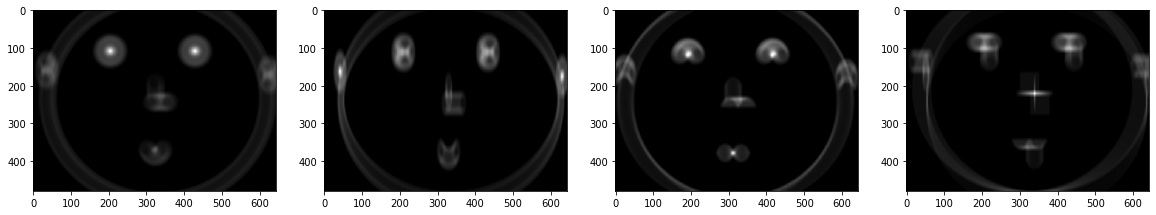

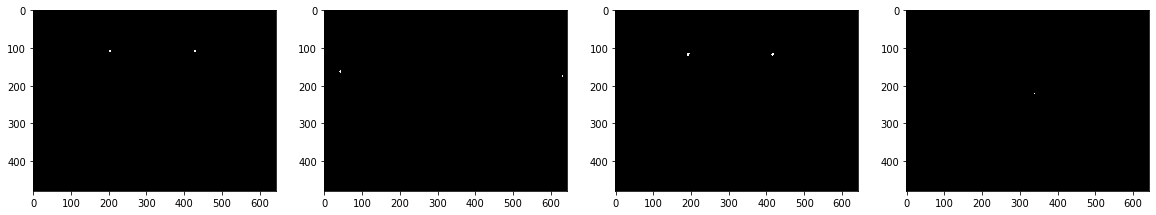

In [11]:
FM = model.predict(A)

# Plotten der Feature maps
plt.figure(figsize=(20,10))
for k in range(4):
    plt.subplot(1, 4 , k +1) #
    plt.imshow(FM[0,:,:,k], cmap=plt.cm.gray)

# Plotten der Werte der Feature maps die >= 80% vom max der Feature map sind
plt.figure(figsize=(20,10))
for k in range(4):
    plt.subplot(1, 4 , k +1) 
    plt.imshow(FM[0,:,:,k]*(FM[0,:,:,k]>=np.max(FM[0,:,:,k])*0.9), cmap=plt.cm.gray)


### Pooling
---

Wir erweitern nun das Model von oben, indem eine Pooling-Operation (als Beispiel Max-Pooling) im Anschluss an den Convolutional-Layer durchgeführt wird.
> Führen Sie diese Pooling Operation mittels https://keras.io/api/layers/pooling_layers/max_pooling2d/ durch. Verwenden Sie einen Filter
Pool-Size von 5x5 und einen Stride von 2. Lassen Sie sich wiederum die entsprechenden Outputs anzeigen.

In [18]:
# Erstellen des Models
model2 = Sequential()
model2.add(Conv2D(4,kernel_size=f_h,use_bias=False, padding='valid',input_shape = (w, h,1)))
model2.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model2.summary()

model2.get_layer('conv2d_10').set_weights([K])
model2.compile(optimizer='rmsprop', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 479, 643, 4)       32400     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 238, 320, 4)       0         
Total params: 32,400
Trainable params: 32,400
Non-trainable params: 0
_________________________________________________________________


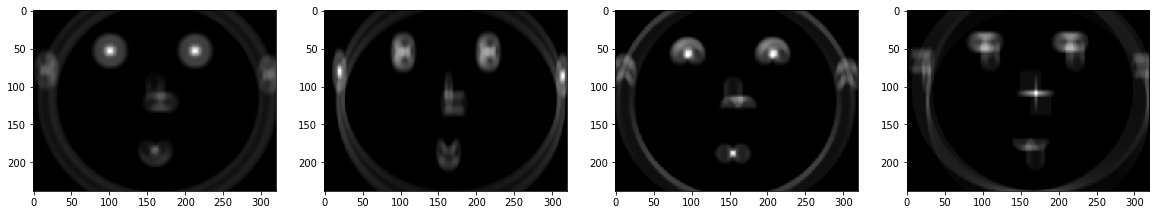

In [19]:
pool = model2.predict(A)
plt.figure(figsize=(20,10))
for k in range(4):
    plt.subplot(1, 4 , k +1) 
    plt.imshow(pool[0,:,:,k], cmap=plt.cm.gray) 